# Drawing UpSet Plots for m6A data

---

Author: Jianheng Liu @ Rui Zhang's Lab, SYSU, China

Email: jhfoxliu@gmail.com

Date: Feb, 2022

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.stats.multitest
import matplotlib as mpl
import matplotlib.pyplot as plt
import upsetplot
import matplotlib.ticker as ticker

# for Linux only, load font file
mpl.font_manager.fontManager.addfont("./arial.ttf")

# configure matplotlib
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [4]:
def draw_upsetplot(df, Cluster_ids=None, tick_total=None, tick_intersect=None, intersection_fn=None, intersection_cutoff=50):
    df2 = df.copy()
    df2 = df2[df2["Cluster"].isin(Cluster_ids)]
    df2 = df2.set_index([i for i in df2.columns if i != "Cluster"])
    upset_obj = upsetplot.UpSet(df2, subset_size='count', intersection_plot_elements=3)
    if intersection_fn is not None:
        upset_obj.intersections.to_csv(intersection_fn)
    print(upset_obj.intersections)
    upset_obj.intersections = upset_obj.intersections[upset_obj.intersections>intersection_cutoff]
    upset = upset_obj.plot()
    
    if tick_total is not None:
        upset["totals"].xaxis.set_major_locator(ticker.MultipleLocator(tick_total))
    
    # upset["intersections"].set_yscale("log")
    if tick_intersect is not None:
        upset["intersections"].set_yticks(tick_intersect)
    

In [3]:
df_clusters = pd.read_csv("m6A_methods.clustered.csv", index_col=0, header=0)

## 1. Analyze different methods

In [12]:
df_methods = df_clusters.copy()
df_methods["m6ACE-seq"] = df_methods[["m6ACE-seq_METTL3", "m6ACE-seq_METTL16", "m6ACE-seq_PCIF1", "m6ACE-seq_FTO_reg", "m6ACE-seq_FTO_OE", "m6ACE-seq_ALKBH5"]].any(axis=1)
df_methods["MAZTER-seq"] = df_methods[["MAZTER-seq_high", "MAZTER-seq_intermediate", "MAZTER-seq_low"]].any(axis=1)
df_methods = df_methods[["CIMS", "CITS", "m6ACE-seq", "m6A-label-seq", "MAZTER-seq", "m6A-REF-seq", "DART-seq", "xPore", "Cluster"]]

MAZTER-seq  m6ACE-seq  CITS   CIMS   m6A-label-seq  DART-seq  m6A-REF-seq  xPore
True        False      False  False  False          False     False        False    13986
False       True       False  False  False          False     False        False    10176
            False      True   False  False          False     False        False     6734
                       False  True   False          False     False        False     5199
                              False  True           False     False        False     6992
                                                                                    ...  
True        True       True   True   True           False     True         False        2
                                                              False        True         1
                                     False          False     True         True        10
                              False  True           False     True         True         2
            False  

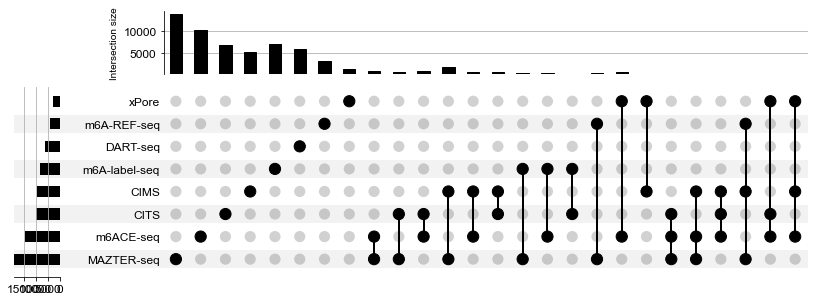

In [22]:
draw_upsetplot(df_methods, Cluster_ids=[1,2,3,4], tick_total=5000, tick_intersect=[5000, 10000], intersection_cutoff=100, intersection_fn="m6A_methods_factors_cluster123_intersections.csv")
plt.savefig("m6A_methods.cluster123.upset.pdf")

m6ACE-seq  CITS   m6A-label-seq  xPore  CIMS   DART-seq  m6A-REF-seq  MAZTER-seq
True       False  False          False  False  False     False        False         4183
False      True   False          False  False  False     False        False         1342
           False  True           False  False  False     False        False         1428
                  False          True   False  False     False        False          235
                                 False  True   False     False        False          118
                                        False  True      False        False           70
                                               False     True         False           66
                                                         False        True             2
True       True   False          False  False  False     False        False          195
           False  True           False  False  False     False        False            5
                  False      

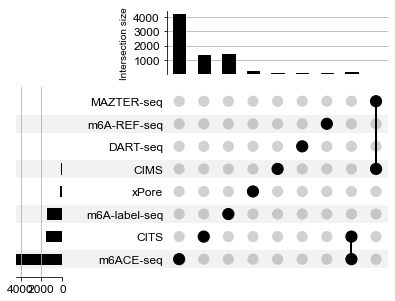

In [21]:
draw_upsetplot(df_methods, Cluster_ids=[5], tick_total=2000, tick_intersect=[1000, 2000, 3000, 4000], intersection_cutoff=10, intersection_fn="m6A_methods_factors_cluster4_intersections.csv")
plt.savefig("m6A_methods.cluster4.upset.pdf")

## 2. Analyze m6ACE-seq

In [16]:
df_m6ACEseq = df_clusters.copy()
df_m6ACEseq = df_m6ACEseq[["m6ACE-seq_METTL3", "m6ACE-seq_METTL16", "m6ACE-seq_PCIF1", "m6ACE-seq_FTO_reg", "m6ACE-seq_FTO_OE", "m6ACE-seq_ALKBH5", "Cluster"]]
df_m6ACEseq.columns = ["METTL3", "METTL16", "PCIF1", "FTO", "FTO (OE)", "ALKBH5", "Cluster"]
df_m6ACEseq = df_m6ACEseq[df_m6ACEseq[["METTL3", "METTL16", "PCIF1", "FTO", "FTO (OE)", "ALKBH5"]].sum(axis=1)>0]

METTL3  PCIF1  METTL16  ALKBH5  FTO (OE)  FTO  
True    False  False    False   False     False    12778
False   True   False    False   False     False      808
        False  True     False   False     False       91
               False    True    False     False      246
                        False   True      False       44
                                False     True        84
True    True   False    False   False     False      109
        False  True     False   False     False      209
False   True   True     False   False     False       36
True    False  False    True    False     False       18
False   True   False    True    False     False        6
True    False  False    False   True      False      126
False   True   False    False   True      False       27
        False  True     False   True      False        5
True    False  False    False   False     True        12
False   True   False    False   False     True         2
        False  False    True    False   

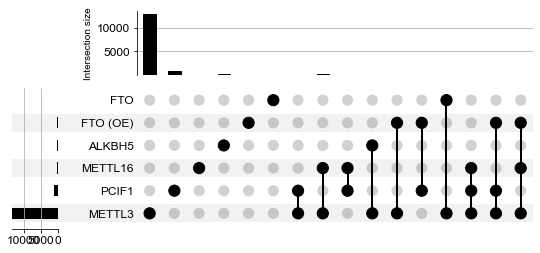

In [28]:
draw_upsetplot(df_m6ACEseq, Cluster_ids=[1,2,3, 4], tick_total=5000, tick_intersect=[5000, 10000], intersection_cutoff=10, intersection_fn="m6ACE_seq_factors_cluster123_intersections.csv")
plt.savefig("m6ACEseq_cluster123.upset.pdf")

PCIF1  METTL3  ALKBH5  METTL16  FTO    FTO (OE)
True   False   False   False    False  False       2676
False  True    False   False    False  False        970
       False   True    False    False  False        322
               False   True     False  False         28
                       False    True   False        116
                                False  True          12
True   True    False   False    False  False         29
       False   True    False    False  False         24
False  True    True    False    False  False          1
True   False   False   True     False  False         94
False  True    False   True     False  False         16
True   False   False   False    True   False          5
False  True    False   False    True   False          2
       False   True    False    True   False          7
True   False   False   False    False  True          64
False  True    False   False    False  True           6
       False   False   True     False  True           1


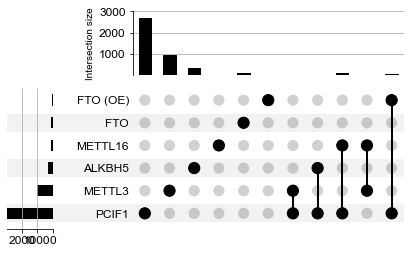

In [25]:
draw_upsetplot(df_m6ACEseq, Cluster_ids=[5], tick_total=1000, tick_intersect=[1000, 2000, 3000], intersection_cutoff=10, intersection_fn="m6ACE_seq_factors_cluster4_intersections.csv")
plt.savefig("m6ACEseq_cluster4.upset.pdf")